## Two circles :)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import aux
import time

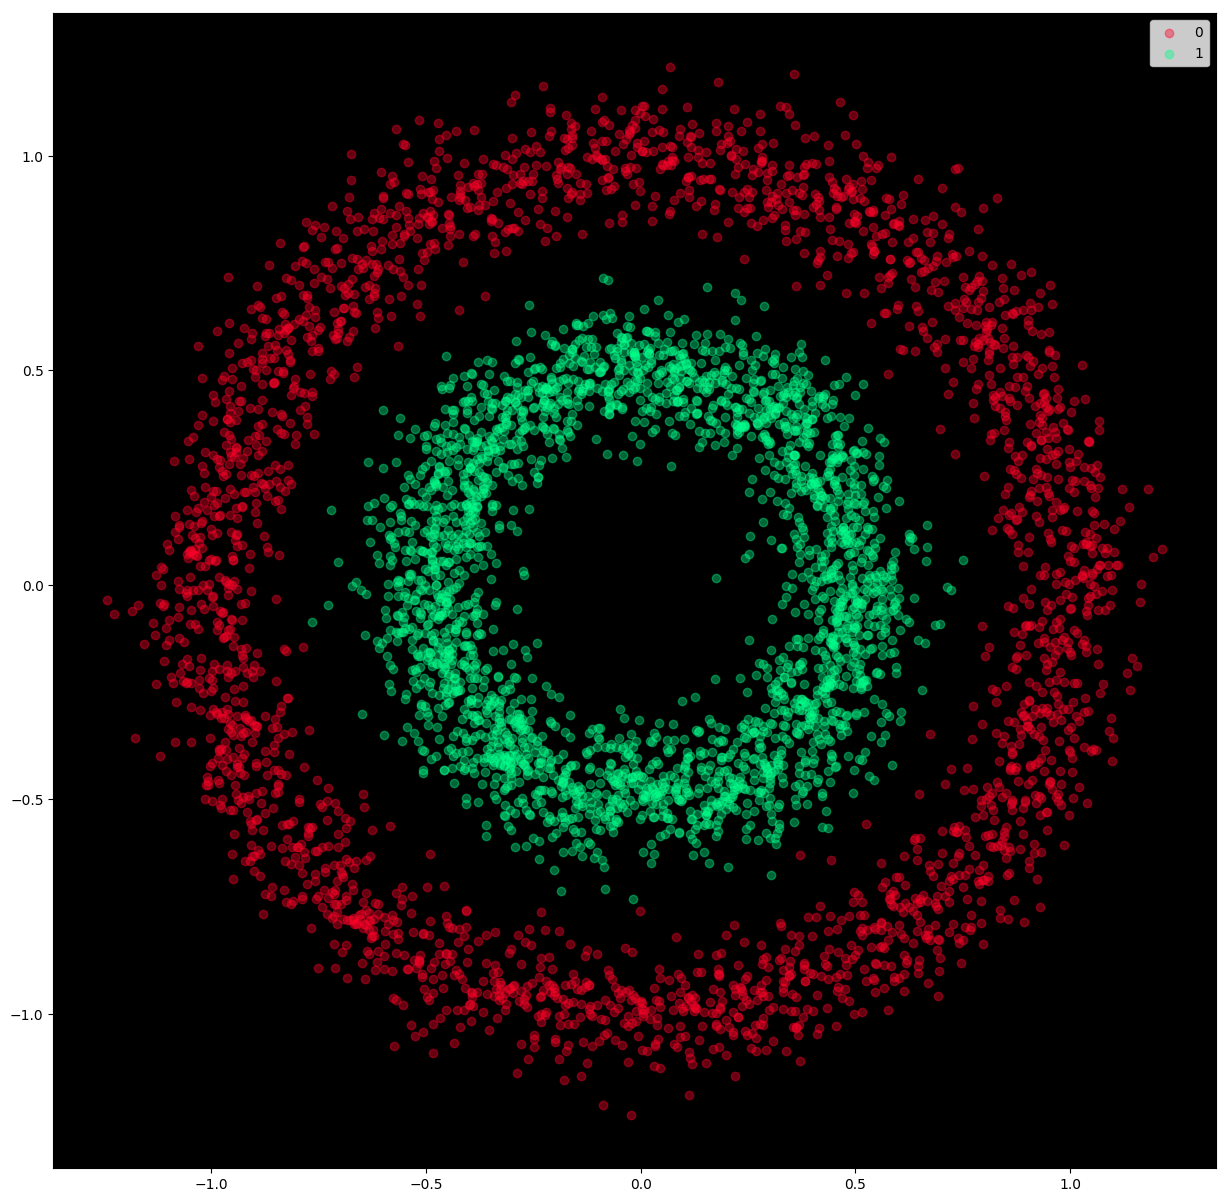

In [22]:
# Some sample data
import sklearn
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=5000, noise=0.08, factor=0.5)
aux.visualize_scatter(data, labels, figsize=(15,15))

## Persistent Homology

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
217.04152870178223


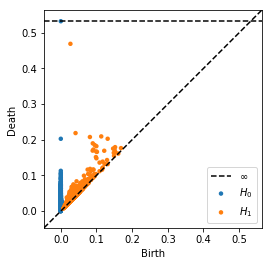

In [18]:
from ripser import Rips

start = time.time()

rips = Rips()
diagrams = rips.fit_transform(data)
end = time.time()
print(end - start)

rips.plot(diagrams)

#### Parameters 
- **maxdim:** the maximum dimension of the persistent homology the algorithm computes.
- **thresh:** the maximum radius of the filtration of Rips complexes

## Mapper

In [23]:
import kmapper as km
from kmapper import jupyter 

start = time.time()

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
lens = mapper.fit_transform(data, projection=[0,1])

# Create dictionary called 'simplicial_complex' with nodes, edges and meta-information
simplicial_complex = mapper.map(lens, 
                   data,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=10),
                   cover=km.Cover(n_cubes=20, perc_overlap=0.1))

# Visualize it
html = mapper.visualize(simplicial_complex, path_html="make_circles_keplermapper_output.html",
                 title="make_circles(n_samples=5000, noise=0.03, factor=0.3)",
                custom_tooltips=labels,
                #color_function = labels
                       )

end = time.time()
print(end - start)

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (5000, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (5000, 2) using lens shaped (5000, 2)

Creating 400 hypercubes.

Created 334 edges and 188 nodes in 0:00:00.210455.
Wrote visualization to: make_circles_keplermapper_output.html


0.713674783706665


In [6]:
# Inline display
jupyter.display(path_html="make_circles_keplermapper_output.html")


#### Parameters
- **lens:** the filter map f from the point cloud to R
- **cover:** the cover I of the image of the filter map f by overlapping intervals
- **clusterer:** the clustering algorithm to identify the connected componets of the preimage by f of the cover I

### UMAP

15.327612161636353


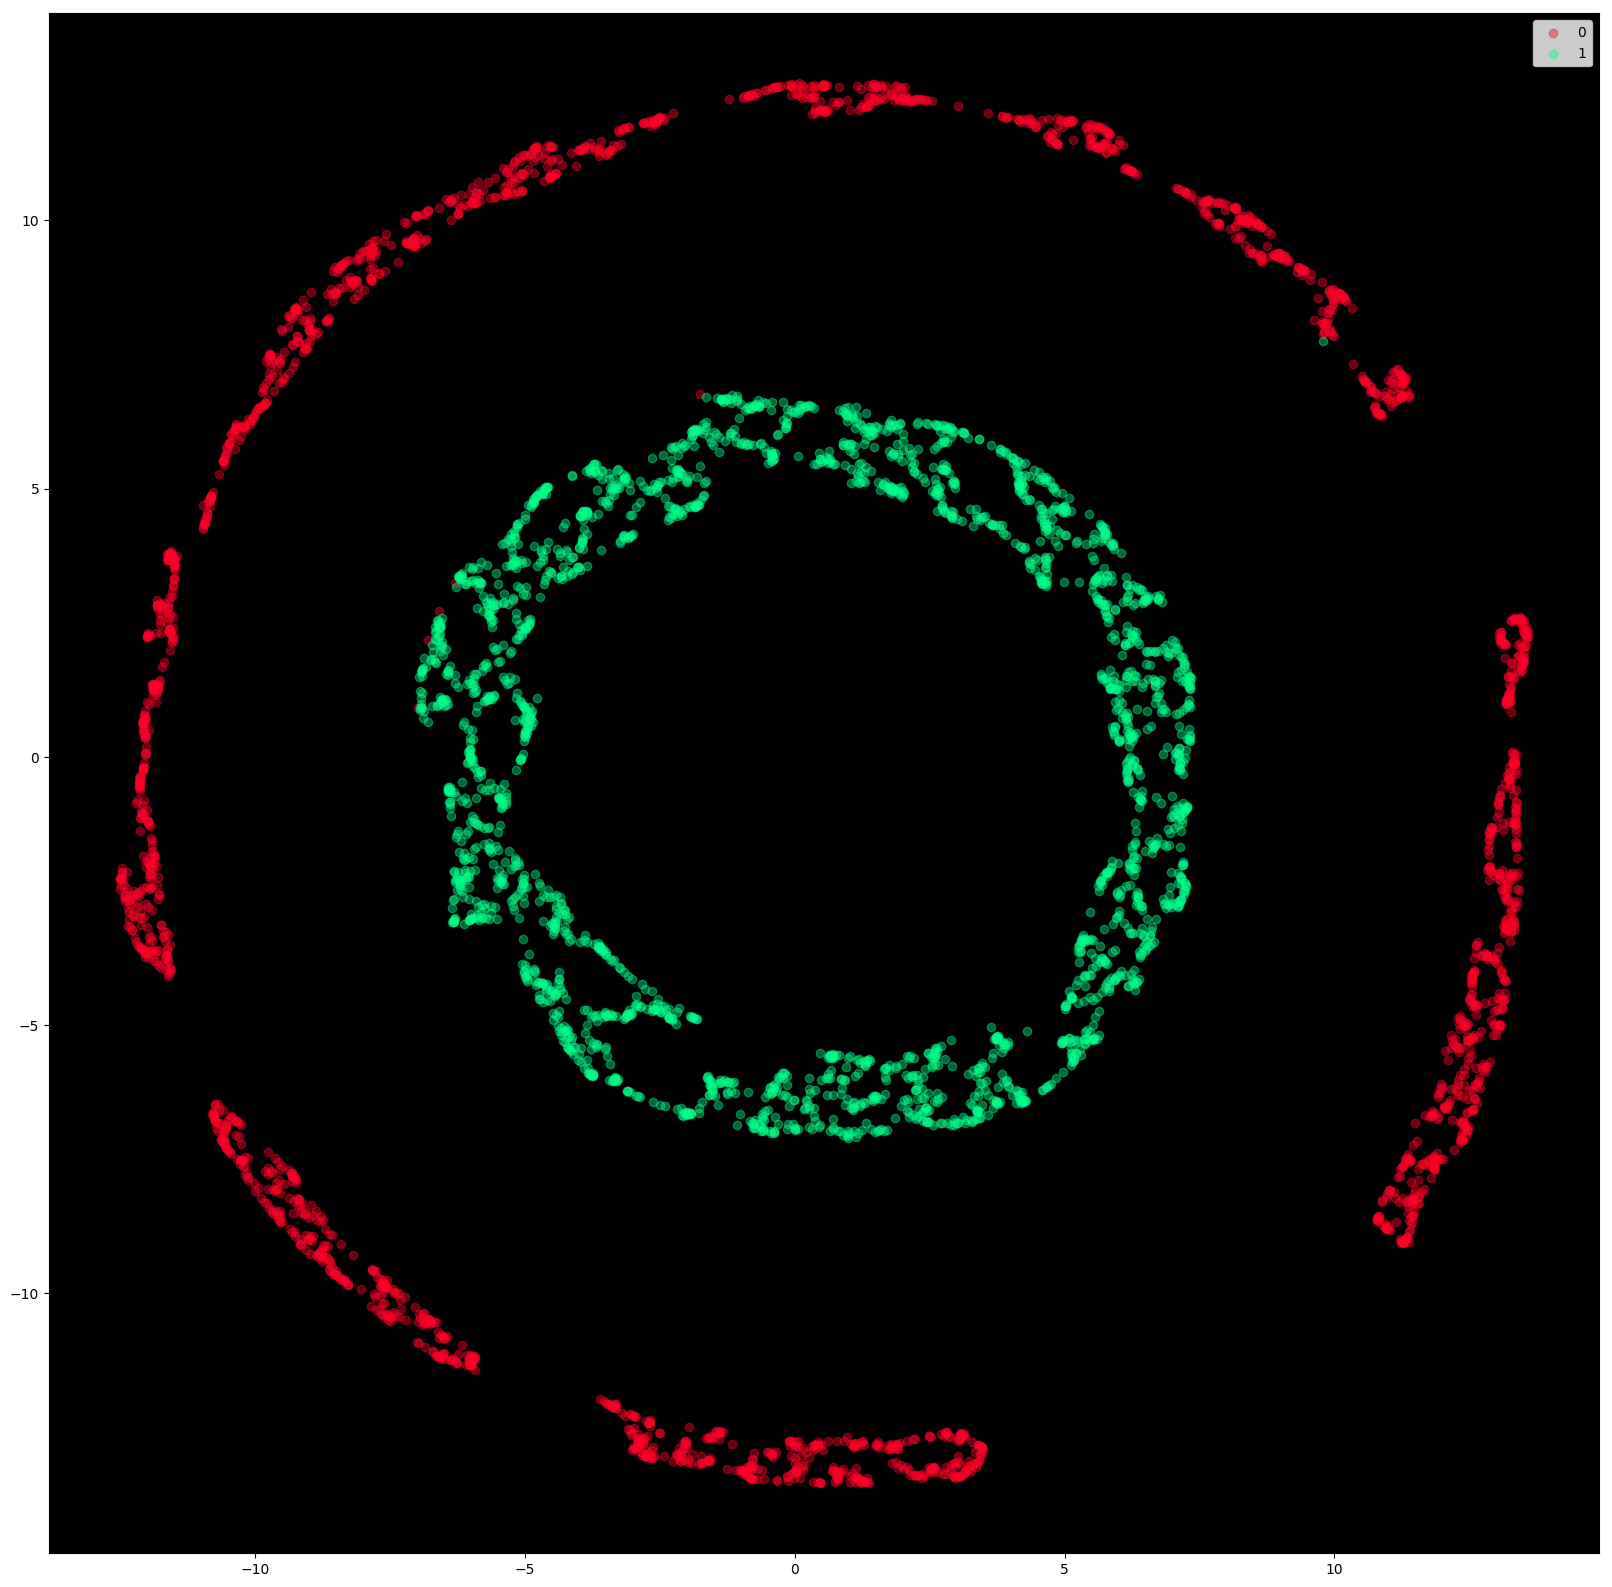

In [25]:
import umap

start = time.time()
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

end = time.time()
print(end - start)
aux.visualize_scatter(embedding, labels)

#### Parameters
- **n_neighbors:** the number of elements of the point cloud required to make a unit ball
- **n_components:** dimension of the projection
- **metric:** how distance is computed in the ambient space of the input data 

## t-SNE

83.69230580329895


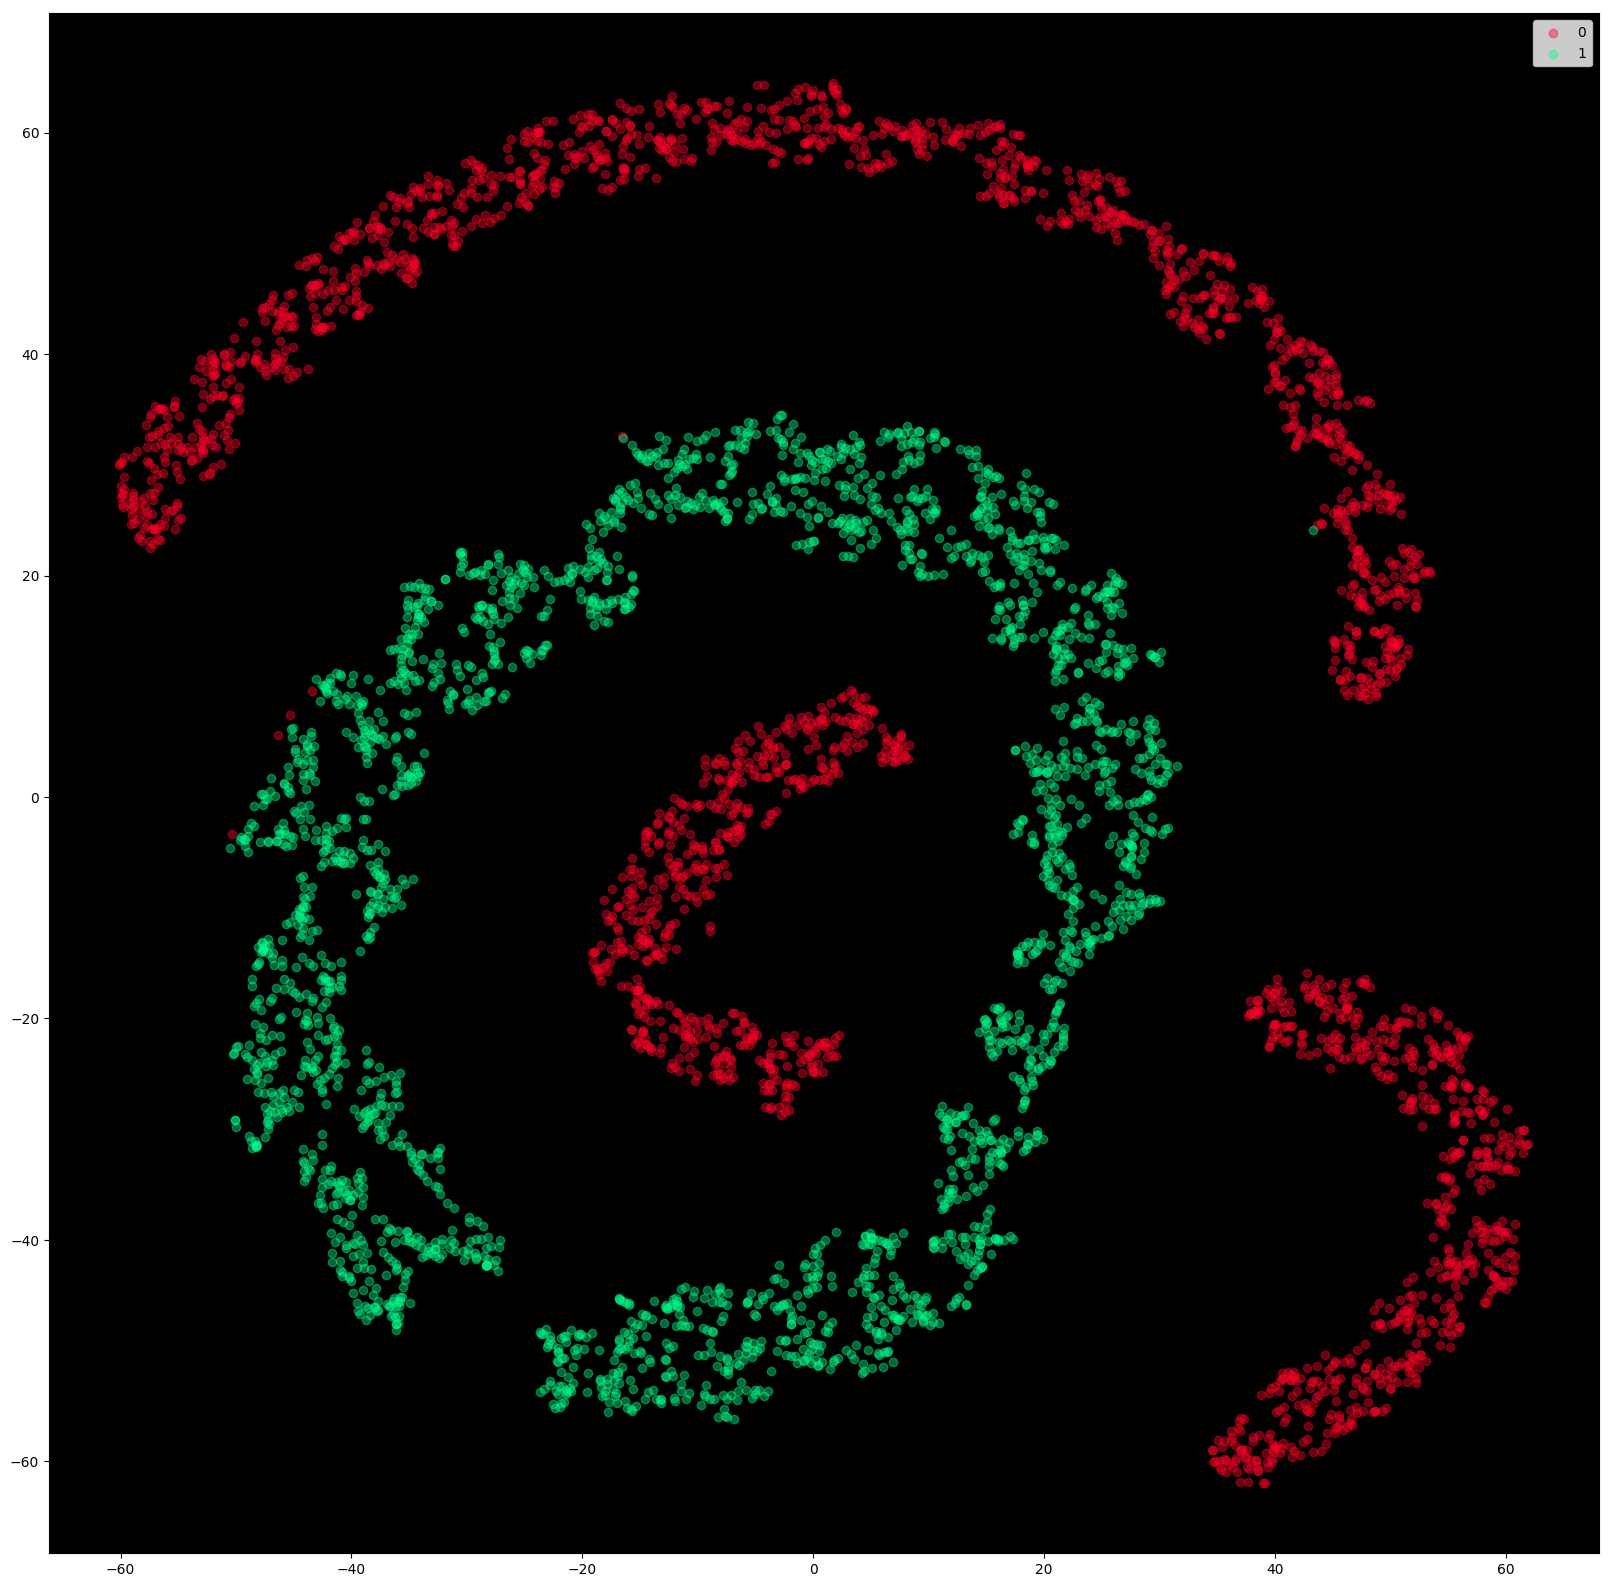

In [29]:
from sklearn.manifold import TSNE

start = time.time()
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(data)

end = time.time()
print(end - start)
visualize_scatter(tsne_result, labels)